In [ ]:
import numpy as np
import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt
# installing libraries not included in google colab by default
!pip install --upgrade category_encoders
import category_encoders as ce 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, plot_confusion_matrix, classification_report, f1_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, ShuffleSplit
import xgboost as xgb


# importing data
data = pd.read_csv("/content/car_sampled.csv",header=None)
data = data.sample(frac=1).reset_index(drop = True)
# data.head()

# Changing column names for betterment
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
data.columns = col_names

In [ ]:
# General data information
data.info()

# Unique values for each attributes and levels for the same.
print("---------------- Unique values for each attributes ----------------")
def show(data):
  for i in data.columns[1:]:
    print("Feature: {} with {} Levels".format(i,data[i].unique()))

show(data)

# Checking for null values
print("-------------------- Checking for null values ---------------------")
data.isnull().sum()

# print("----------------- Number of instances per class -------------------")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2195 entries, 0 to 2194
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    2195 non-null   object
 1   maint     2195 non-null   object
 2   doors     2195 non-null   object
 3   persons   2195 non-null   object
 4   lug_boot  2195 non-null   object
 5   safety    2195 non-null   object
 6   class     2195 non-null   object
dtypes: object(7)
memory usage: 120.2+ KB
---------------- Unique values for each attributes ----------------
Feature: maint with ['high' 'low' 'vhigh' 'med'] Levels
Feature: doors with ['5more' '3' '2' '4'] Levels
Feature: persons with ['more' '2' '4'] Levels
Feature: lug_boot with ['small' 'big' 'med'] Levels
Feature: safety with ['med' 'low' 'high'] Levels
Feature: class with ['unacc' 'acc' 'vgood' 'good'] Levels
-------------------- Checking for null values ---------------------


buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

Here we are converting ordinal data in to numeric values.

In [ ]:

encoder = ce.OrdinalEncoder(cols = ['buying','maint','doors','persons','lug_boot','safety','class'])
data = encoder.fit_transform(data)
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,1,1,1,1,1
1,2,1,2,2,1,2,1
2,2,2,3,3,1,2,1
3,2,3,3,3,1,2,1
4,3,3,2,3,2,2,2


In [ ]:
x = data.drop(['class'], axis = 1)
y = data['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 48)

In [ ]:
############### Making Validation Function Universal ############
def validation(model, x, y):
  #accuracy = []
  # K = input('Enter K for KFold cross validation : ')
  # K = int(K)
  K = 10
  #kfold = KFold(n_splits = K)
  #from sklearn.model_selection import ShuffleSplit, LeaveOneOut
#  for i, score in enumerate(cross_val_score(model, x,y, cv=kfold)):
 #   accuracy.append(score)

  #print("The average accuracy with", K, "Fold Cross Validation is", stats.mean(accuracy))
  print("---------------------------------------------------------------------------------------------")

  print("Shuffle split :  In this method, number of splits = ", K,  "will be generated and in each split, test size will be", (1/K), "of the total dataset")

  accuracy = []
  cv = ShuffleSplit(n_splits=K, test_size=(float(1/K)), random_state=48)

  for i, score in enumerate(cross_val_score(model, x, y, cv=cv)):
    accuracy.append(score)

  print("The average accuracy with", K, "Fold Shuffled Cross Validation is", stats.mean(accuracy))
  print("---------------------------------------------------------------------------------------------")

  # print("Leave One Out corss validation : accuracy with leave one out validation")
  # cv = LeaveOneOut()
  # #cv = ShuffleSplit(n_splits=x.shape[0], test_size=0.3, random_state=0)
  # for i, score in enumerate(cross_val_score(lr, x, y, cv=cv)):
  #   accuracy.append(score)

  # print("The average accuracy with Leave One Out Cross Validation is", stats.mean(accuracy))


**Logistic regression**

In [ ]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(x_train,y_train)

yp_train = lr.predict(x_train)
yp_test = lr.predict(x_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, yp_test))
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,yp_test))
print(classification_report(y_test,yp_test))


########################  VALIDATION ######################
import statistics as stats
validation(lr, x, y)
# accuracy = []
# K = input('Enter K for KFold cross validation')
# K = int(K)
# kfold = KFold(n_splits = K)
# from sklearn.model_selection import ShuffleSplit, LeaveOneOut
# for i, score in enumerate(cross_val_score(lr, x,y, cv=kfold)):
#     accuracy.append(score)

# print("The average accuracy with", K, "Fold Cross Validation is", stats.mean(accuracy))
# print("---------------------------------------------------------------------------------------------")

# print("Shuffle split :  In this method, number of splits = ", K,  "will be generated and in each split, test size will be", (1/K))

# accuracy = []
# cv = ShuffleSplit(n_splits=K, test_size=(float(1/K)), random_state=8)

# for i, score in enumerate(cross_val_score(lr, x, y, cv=cv)):
#   accuracy.append(score)

# print("The average accuracy with", K, "Fold Shuffled Cross Validation is", stats.mean(accuracy))
# print("---------------------------------------------------------------------------------------------")

# print("Leave One Out corss validation : accuracy with leave one out validation")
# cv = LeaveOneOut()
# #cv = ShuffleSplit(n_splits=x.shape[0], test_size=0.3, random_state=0)
# for i, score in enumerate(cross_val_score(lr, x, y, cv=cv)):
#   accuracy.append(score)

# print("The average accuracy with Leave One Out Cross Validation is", stats.mean(accuracy))


Accuracy: 0.6228868660598179
[[359   0  60   0]
 [128   0   0   0]
 [  0   0 120   0]
 [102   0   0   0]]
              precision    recall  f1-score   support

           1       0.61      0.86      0.71       419
           2       0.00      0.00      0.00       128
           3       0.67      1.00      0.80       120
           4       0.00      0.00      0.00       102

    accuracy                           0.62       769
   macro avg       0.32      0.46      0.38       769
weighted avg       0.44      0.62      0.51       769

---------------------------------------------------------------------------------------------
Shuffle split :  In this method, number of splits =  10 will be generated and in each split, test size will be 0.1 of the total dataset


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The average accuracy with 10 Fold Shuffled Cross Validation is 0.6104545454545455
---------------------------------------------------------------------------------------------


**Random Forest**

Accuracy for depth =  1  :  0.5448634590377113
Accuracy for depth =  2  :  0.5448634590377113
Accuracy for depth =  3  :  0.8478543563068921
Accuracy for depth =  4  :  0.9544863459037711
Accuracy for depth =  5  :  0.9544863459037711
Accuracy for depth =  6  :  0.9856957087126138
Accuracy for depth =  7  :  0.988296488946684
Accuracy for depth =  8  :  0.9947984395318595
Accuracy for depth =  9  :  0.9947984395318595
Accuracy for depth =  10  :  0.9960988296488946
Accuracy for depth =  11  :  0.9947984395318595
Accuracy for depth =  12  :  0.9947984395318595
Accuracy for depth =  13  :  0.9934980494148244
Accuracy for depth =  14  :  0.9934980494148244
Accuracy for depth =  15  :  0.9934980494148244
Accuracy for depth =  16  :  0.9934980494148244
Accuracy for depth =  17  :  0.9934980494148244
Accuracy for depth =  18  :  0.9934980494148244
Accuracy for depth =  19  :  0.9934980494148244
Accuracy for depth =  20  :  0.9934980494148244
Accuracy for depth =  21  :  0.9934980494148244
Ac

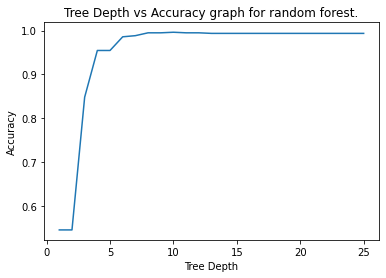

In [ ]:
rf_accuracy = []
x_axis = []
max_accuracy = 0
max_accuracy_depth = 0
for i in range(1,26):
  rf = RandomForestClassifier(max_depth = i,random_state = 0)
  rf.fit(x_train,y_train)

  yp_test = rf.predict(x_test)
  rf_accuracy.append(metrics.accuracy_score(y_test, yp_test))
  print("Accuracy for depth = ", i, " : ", metrics.accuracy_score(y_test, yp_test))
  if(metrics.accuracy_score(y_test, yp_test) > max_accuracy):
    max_accuracy_depth = i
    max_accuracy = metrics.accuracy_score(y_test, yp_test)
  x_axis.append(i)


print("The maximum accuracy = ", max_accuracy, "here can be found at tree depth = ", max_accuracy_depth)
 
# importing the required module 
plt.plot(x_axis, rf_accuracy)

plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Tree Depth vs Accuracy graph for random forest.')
 
plt.show()



In [ ]:
# Keeping max_depth = 9, since we are getting maximum accuracy at that depth.
# for max_depth > 9 we get less accuracy because of overfitting.

rf = RandomForestClassifier(n_estimators=50, max_features = 6, criterion = 'entropy', max_depth = max_accuracy_depth,random_state = 48)
rf.fit(x_train,y_train)

yp_train = rf.predict(x_train)
yp_test = rf.predict(x_test)


print("Accuracy:",metrics.accuracy_score(y_test, yp_test))
print(confusion_matrix(y_test,yp_test))
print(classification_report(y_test,yp_test))
# evaluation_parametrics(y_train,yp_train,y_test,yp_test)
validation(rf, x, y)

Accuracy: 0.9986996098829649
[[418   0   1   0]
 [  0 128   0   0]
 [  0   0 120   0]
 [  0   0   0 102]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       419
           2       1.00      1.00      1.00       128
           3       0.99      1.00      1.00       120
           4       1.00      1.00      1.00       102

    accuracy                           1.00       769
   macro avg       1.00      1.00      1.00       769
weighted avg       1.00      1.00      1.00       769

---------------------------------------------------------------------------------------------
Shuffle split :  In this method, number of splits =  10 will be generated and in each split, test size will be 0.1 of the total dataset
The average accuracy with 10 Fold Shuffled Cross Validation is 0.9986363636363637
---------------------------------------------------------------------------------------------


In above classification technique although we get 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# The number of parallel jobs to run for neighbors search.
# None means 1 unless in a joblib.parallel_backend context.
# -1 means using all processors.
knn=KNeighborsClassifier(n_jobs=-1)
knn.fit(x_train,y_train)

# yp_train = rf.predict(x_train)
yp_test = rf.predict(x_test)


print("Accuracy:",metrics.accuracy_score(y_test, yp_test))
print(confusion_matrix(y_test,yp_test))
print(classification_report(y_test,yp_test))
validation(knn, x, y)

Accuracy: 0.9986996098829649
[[418   0   1   0]
 [  0 128   0   0]
 [  0   0 120   0]
 [  0   0   0 102]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       419
           2       1.00      1.00      1.00       128
           3       0.99      1.00      1.00       120
           4       1.00      1.00      1.00       102

    accuracy                           1.00       769
   macro avg       1.00      1.00      1.00       769
weighted avg       1.00      1.00      1.00       769

---------------------------------------------------------------------------------------------
Shuffle split :  In this method, number of splits =  10 will be generated and in each split, test size will be 0.1 of the total dataset
The average accuracy with 10 Fold Shuffled Cross Validation is 0.9559090909090909
---------------------------------------------------------------------------------------------


**XGBOOST**

Accuracy for depth =  1  :  0.8504551365409623
Accuracy for depth =  2  :  0.9856957087126138
Accuracy for depth =  3  :  0.9856957087126138
Accuracy for depth =  4  :  0.9934980494148244
Accuracy for depth =  5  :  0.9947984395318595
Accuracy for depth =  6  :  0.9960988296488946
Accuracy for depth =  7  :  0.9960988296488946
Accuracy for depth =  8  :  0.9960988296488946
Accuracy for depth =  9  :  0.9960988296488946
Accuracy for depth =  10  :  0.9960988296488946
Accuracy for depth =  11  :  0.9960988296488946
Accuracy for depth =  12  :  0.9960988296488946
Accuracy for depth =  13  :  0.9960988296488946
Accuracy for depth =  14  :  0.9960988296488946
Accuracy for depth =  15  :  0.9960988296488946
Accuracy for depth =  16  :  0.9960988296488946
Accuracy for depth =  17  :  0.9960988296488946
Accuracy for depth =  18  :  0.9960988296488946
Accuracy for depth =  19  :  0.9960988296488946
Accuracy for depth =  20  :  0.9960988296488946
Accuracy for depth =  21  :  0.9960988296488946
A

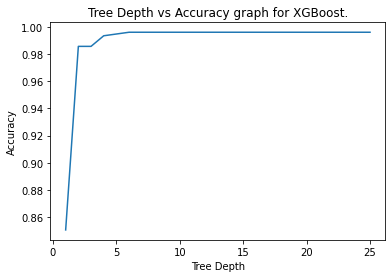

In [ ]:
xgb_accuracy = []
x_axis = []
max_accuracy = 0
max_accuracy_depth = 0
for i in range(1,26):
  xgb_classifier = xgb.XGBClassifier(max_depth=i)
  xgb_classifier.fit(x_train, y_train)
  preds = xgb_classifier.predict(x_test)
  print("Accuracy for depth = ", i, " : ", metrics.accuracy_score(y_test, preds))
  if(metrics.accuracy_score(y_test, preds) > max_accuracy):
    max_accuracy_depth = i
    max_accuracy = metrics.accuracy_score(y_test, preds)
  xgb_accuracy.append(metrics.accuracy_score(y_test, preds))
  x_axis.append(i)

print("The maximum accuracy = ", max_accuracy, "here can be found at tree depth = ", max_accuracy_depth)

############ Plot #############
plt.plot(x_axis, xgb_accuracy)
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Tree Depth vs Accuracy graph for XGBoost.')
 
plt.show()

In [ ]:
# !pip install xgboost
xgb_classifier = xgb.XGBClassifier(max_depth=max_accuracy_depth)
# here max depth is set to 5 since that is the depth we get from above graph.

# Fit
xgb_classifier.fit(x_train, y_train)

# Predict
preds = xgb_classifier.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, preds))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))
validation(xgb_classifier, x, y)

Accuracy: 0.9960988296488946
[[418   0   1   0]
 [  0 126   0   2]
 [  0   0 120   0]
 [  0   0   0 102]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       419
           2       1.00      0.98      0.99       128
           3       0.99      1.00      1.00       120
           4       0.98      1.00      0.99       102

    accuracy                           1.00       769
   macro avg       0.99      1.00      0.99       769
weighted avg       1.00      1.00      1.00       769

---------------------------------------------------------------------------------------------
Shuffle split :  In this method, number of splits =  10 will be generated and in each split, test size will be 0.1 of the total dataset
The average accuracy with 10 Fold Shuffled Cross Validation is 0.9981818181818182
---------------------------------------------------------------------------------------------


Here the problem remains the same since for class 3 and 4 precision remain low, 0.92 and 0.81 respectively.

We have to use sampling methods to rectify error in minority classes.
Since we have small data set with only 1728 samples there is no run time constrain. so, we'll avoide under sampling methods

ADASYN focuses on generating samples next to the original samples
which are wrongly classified using a k-Nearest Neighbors classifier while the
basic implementation of SMOTE will not make any distinction between easy
and hard samples to be classified using the nearest neighbors rule.

**ADASYN**

resampling of x and y.

In [ ]:
from imblearn.over_sampling import ADASYN
oversample = ADASYN()
# print(len(y))
x_resampled, y_resampled = oversample.fit_resample(x, y)
# print(len(y_resampled))
x_train_resampled, x_test_resampled, y_train_resampled, y_test_resampled = train_test_split(x_resampled, y_resampled, test_size = 0.35, random_state = 48)

Accuracy for depth =  1  :  0.9158208955223881
Accuracy for depth =  2  :  0.9868656716417911
Accuracy for depth =  3  :  0.9940298507462687
Accuracy for depth =  4  :  0.9946268656716418
Accuracy for depth =  5  :  0.9970149253731343
Accuracy for depth =  6  :  0.9982089552238806
Accuracy for depth =  7  :  0.9982089552238806
Accuracy for depth =  8  :  0.9982089552238806
Accuracy for depth =  9  :  0.9982089552238806


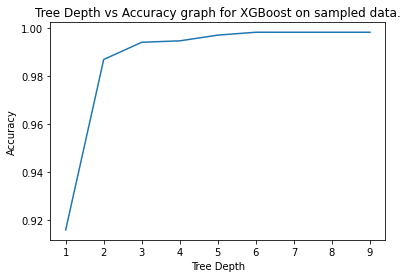

The maximum accuracy =  0.9982089552238806 here can be found at tree depth =  6
[[420   0   3   0]
 [  0 399   0   0]
 [  0   0 433   0]
 [  0   0   0 420]]
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       423
           2       1.00      1.00      1.00       399
           3       0.99      1.00      1.00       433
           4       1.00      1.00      1.00       420

    accuracy                           1.00      1675
   macro avg       1.00      1.00      1.00      1675
weighted avg       1.00      1.00      1.00      1675

---------------------------------------------------------------------------------------------
Shuffle split :  In this method, number of splits =  10 will be generated and in each split, test size will be 0.1 of the total dataset
The average accuracy with 10 Fold Shuffled Cross Validation is 0.9989561586638831
---------------------------------------------------------------------------------------------


In [ ]:
xgb_accuracy_resampled = []
x_axis = []
max_accuracy = 0
max_accuracy_depth = 0
for i in range(1,10):
  xgb_classifier = xgb.XGBClassifier(max_depth=i)
  xgb_classifier.fit(x_train_resampled, y_train_resampled)
  preds_resampled = xgb_classifier.predict(x_test_resampled)
  xgb_accuracy_resampled.append(metrics.accuracy_score(y_test_resampled, preds_resampled))
  print("Accuracy for depth = ", i, " : ", metrics.accuracy_score(y_test_resampled, preds_resampled))
  if(metrics.accuracy_score(y_test_resampled, preds_resampled) > max_accuracy):
    max_accuracy_depth = i
    max_accuracy = metrics.accuracy_score(y_test_resampled, preds_resampled)
  x_axis.append(i)

############## Plot ###########
plt.plot(x_axis, xgb_accuracy_resampled)
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Tree Depth vs Accuracy graph for XGBoost on sampled data.') 
plt.show()

print("The maximum accuracy = ", max_accuracy, "here can be found at tree depth = ", max_accuracy_depth)
######### Confusion matrix ##########
print(confusion_matrix(y_test_resampled, preds_resampled))
print(classification_report(y_test_resampled, preds_resampled))
validation(xgb_classifier, x_resampled, y_resampled)


In [ ]:
xgb_classifier = xgb.XGBClassifier(max_depth=max_accuracy_depth)
# here max depth is set to 4 since that is the depth we get from above graph.

# Fit
xgb_classifier.fit(x_train_resampled, y_train_resampled)

# Predict
preds_resampled = xgb_classifier.predict(x_test_resampled)

print("Accuracy:",metrics.accuracy_score(y_test_resampled, preds_resampled))
print(confusion_matrix(y_test_resampled, preds_resampled))
print(classification_report(y_test_resampled, preds_resampled))

print("__________predicting for original x using model trained on sampled data.___________________")
preds_resampled = xgb_classifier.predict(x)

print("Accuracy:",metrics.accuracy_score(y, preds_resampled))
print(confusion_matrix(y, preds_resampled))
print(classification_report(y, preds_resampled))

print("__________predicting for original x_test using model trained on sampled data.___________________")
preds_resampled = xgb_classifier.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, preds_resampled))
print(confusion_matrix(y_test, preds_resampled))
print(classification_report(y_test, preds_resampled))

validation(xgb_classifier, x_resampled, y_resampled)

Accuracy: 0.9982089552238806
[[420   0   3   0]
 [  0 399   0   0]
 [  0   0 433   0]
 [  0   0   0 420]]
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       423
           2       1.00      1.00      1.00       399
           3       0.99      1.00      1.00       433
           4       1.00      1.00      1.00       420

    accuracy                           1.00      1675
   macro avg       1.00      1.00      1.00      1675
weighted avg       1.00      1.00      1.00      1675

__________predicting for original x using model trained on sampled data.___________________
Accuracy: 0.9986332574031891
[[1207    0    3    0]
 [   0  384    0    0]
 [   0    0  325    0]
 [   0    0    0  276]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1210
           2       1.00      1.00      1.00       384
           3       0.99      1.00      1.00       325
           4       1.00     

Here, accuracy is decreased from 98.26% in XGBoost to 97.22% including sampled data. but precission for minority classes has seen derastic increase because of sampling.

Accuracy for depth =  1  :  0.8772136953955135
Accuracy for depth =  2  :  0.9899645808736718
Accuracy for depth =  3  :  0.9952774498229043
Accuracy for depth =  4  :  0.9952774498229043
Accuracy for depth =  5  :  0.9970484061393152
Accuracy for depth =  6  :  0.999409681227863
Accuracy for depth =  7  :  0.999409681227863
Accuracy for depth =  8  :  0.999409681227863
Accuracy for depth =  9  :  0.999409681227863


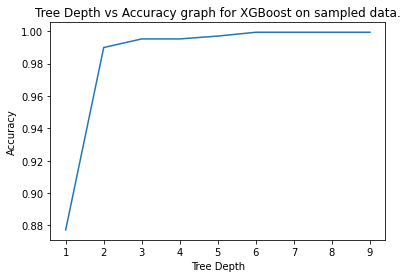

[[432   0   1   0]
 [  0 408   0   0]
 [  0   0 431   0]
 [  0   0   0 422]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       433
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       431
           4       1.00      1.00      1.00       422

    accuracy                           1.00      1694
   macro avg       1.00      1.00      1.00      1694
weighted avg       1.00      1.00      1.00      1694

---------------------------------------------------------------------------------------------
Shuffle split :  In this method, number of splits =  10 will be generated and in each split, test size will be 0.1 of the total dataset
The average accuracy with 10 Fold Shuffled Cross Validation is 1.0
---------------------------------------------------------------------------------------------


In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
# print(len(y))
x_resampled_smote, y_resampled_smote = oversample.fit_resample(x, y)
# print(len(y_resampled))
x_train_resampled_smote, x_test_resampled_smote, y_train_resampled_smote, y_test_resampled_smote = train_test_split(x_resampled_smote, y_resampled_smote, test_size = 0.35, random_state = 48)
max_accuracy = 0
max_accuracy_depth = 0
xgb_accuracy_resampled_smote = []
x_axis = []
for i in range(1,10):
  xgb_classifier = xgb.XGBClassifier(max_depth=i)
  xgb_classifier.fit(x_train_resampled_smote, y_train_resampled_smote)
  preds_resampled_smote = xgb_classifier.predict(x_test_resampled_smote)
  xgb_accuracy_resampled_smote.append(metrics.accuracy_score(y_test_resampled_smote, preds_resampled_smote))
  print("Accuracy for depth = ", i, " : ", metrics.accuracy_score(y_test_resampled_smote, preds_resampled_smote))
  if(metrics.accuracy_score(y_test_resampled_smote, preds_resampled_smote) > max_accuracy):
    max_accuracy_depth = i
    max_accuracy = metrics.accuracy_score(y_test_resampled_smote, preds_resampled_smote)
  x_axis.append(i)

############# Plot #########
plt.plot(x_axis, xgb_accuracy_resampled_smote)
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Tree Depth vs Accuracy graph for XGBoost on sampled data.') 
plt.show()

########### Confusion Matrix #########

print(confusion_matrix(y_test_resampled_smote, preds_resampled_smote))
print(classification_report(y_test_resampled_smote, preds_resampled_smote))
validation(xgb_classifier, x_resampled_smote, y_resampled_smote)

In [ ]:
xgb_classifier = xgb.XGBClassifier(max_depth=max_accuracy_depth)
# here max depth is set to 8 since that is the depth we get from above graph.

# Fit
xgb_classifier.fit(x_train_resampled, y_train_resampled)

# Predict
preds_resampled = xgb_classifier.predict(x_test_resampled)

print("Accuracy:",metrics.accuracy_score(y_test_resampled, preds_resampled))
print(confusion_matrix(y_test_resampled, preds_resampled))
print(classification_report(y_test_resampled, preds_resampled))

print("__________predicting for original x using model trained on sampled data.___________________")
preds_resampled = xgb_classifier.predict(x)

print("Accuracy:",metrics.accuracy_score(y, preds_resampled))
print(confusion_matrix(y, preds_resampled))
print(classification_report(y, preds_resampled))

print("__________predicting for original x_test using model trained on sampled data.___________________")
preds_resampled = xgb_classifier.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, preds_resampled))
print(confusion_matrix(y_test, preds_resampled))
print(classification_report(y_test, preds_resampled))

validation(xgb_classifier, x_resampled, y_resampled)

Accuracy: 0.9982089552238806
[[420   0   3   0]
 [  0 399   0   0]
 [  0   0 433   0]
 [  0   0   0 420]]
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       423
           2       1.00      1.00      1.00       399
           3       0.99      1.00      1.00       433
           4       1.00      1.00      1.00       420

    accuracy                           1.00      1675
   macro avg       1.00      1.00      1.00      1675
weighted avg       1.00      1.00      1.00      1675

__________predicting for original x using model trained on sampled data.___________________
Accuracy: 0.9986332574031891
[[1207    0    3    0]
 [   0  384    0    0]
 [   0    0  325    0]
 [   0    0    0  276]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1210
           2       1.00      1.00      1.00       384
           3       0.99      1.00      1.00       325
           4       1.00     

In [ ]:
### Grid Search CV #####
from sklearn.model_selection import ShuffleSplit
params = {
        #'min_child_weight': [1, 5, 10],
        #'gamma': [0.5, 1, 1.5, 2, 5],
        #'subsample': [0.6, 0.7, 0.8],
        #'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [6, 7, 8],
        'learning_rate': [0.01, 0.05, 0.1]
        }
xgb_classifier = xgb.XGBClassifier( objective='binary:logistic')
cv = ShuffleSplit(n_splits=10, test_size=(float(1/10)), random_state=48)
clf = GridSearchCV(estimator = xgb_classifier, param_grid=params, verbose=3, scoring = 'accuracy', cv=cv)
clf.fit(x,y)

print(clf.best_estimator_[0])
print(clf.best_score_)



Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END ..learning_rate=0.01, max_depth=6;, score=0.982 total time=   0.4s
[CV 2/10] END ..learning_rate=0.01, max_depth=6;, score=0.991 total time=   0.4s
[CV 3/10] END ..learning_rate=0.01, max_depth=6;, score=0.995 total time=   0.4s
[CV 4/10] END ..learning_rate=0.01, max_depth=6;, score=0.982 total time=   0.4s
[CV 5/10] END ..learning_rate=0.01, max_depth=6;, score=0.986 total time=   0.4s
[CV 6/10] END ..learning_rate=0.01, max_depth=6;, score=0.986 total time=   0.4s
[CV 7/10] END ..learning_rate=0.01, max_depth=6;, score=0.995 total time=   0.4s
[CV 8/10] END ..learning_rate=0.01, max_depth=6;, score=0.982 total time=   0.4s
[CV 9/10] END ..learning_rate=0.01, max_depth=6;, score=0.977 total time=   0.4s
[CV 10/10] END .learning_rate=0.01, max_depth=6;, score=0.995 total time=   0.4s
[CV 1/10] END ..learning_rate=0.01, max_depth=7;, score=0.986 total time=   0.5s
[CV 2/10] END ..learning_rate=0.01, max_depth=7;

TypeError: ignored